In [1]:
import pandas as pd
import numpy as np

In [2]:
activity = pd.read_csv('../data/Nutrition.csv')

In [3]:
activity.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [4]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   104272 non-null  int64  
 1   YearEnd                     104272 non-null  int64  
 2   LocationAbbr                104272 non-null  object 
 3   LocationDesc                104272 non-null  object 
 4   Datasource                  104272 non-null  object 
 5   Class                       104272 non-null  object 
 6   Topic                       104272 non-null  object 
 7   Question                    104272 non-null  object 
 8   Data_Value_Unit             88872 non-null   float64
 9   Data_Value_Type             104272 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  10767 non-null   object 
 13  Data_Value_Foo

## Information about data
Each row represents a combination of a year, state, survey question, and percent of individuals who are positively identified for that question, along with stratification. The categories for stratification are Age Range, Education, Gender, Income, Race/Ethnicity, and Total.

This dataset includes observations for the years 2011-2023. Percentages and data are not included for groups with insufficient sample sizes.


In [5]:
activity_clean = activity.copy()

We are only interested in questions related to physical activity stratified by income.

In [6]:
activity_clean = activity_clean.loc[activity_clean['Topic'] == 'Physical Activity - Behavior']
activity_clean.drop(columns=["Total", "Education", "Age(years)", "Gender", "Race/Ethnicity", "GeoLocation"], inplace=True)
activity_clean = activity_clean[activity_clean['StratificationCategory1'] == "Income"]
activity_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13930 entries, 13 to 104269
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   13930 non-null  int64  
 1   YearEnd                     13930 non-null  int64  
 2   LocationAbbr                13930 non-null  object 
 3   LocationDesc                13930 non-null  object 
 4   Datasource                  13930 non-null  object 
 5   Class                       13930 non-null  object 
 6   Topic                       13930 non-null  object 
 7   Question                    13930 non-null  object 
 8   Data_Value_Unit             11620 non-null  float64
 9   Data_Value_Type             13930 non-null  object 
 10  Data_Value                  13775 non-null  float64
 11  Data_Value_Alt              13775 non-null  float64
 12  Data_Value_Footnote_Symbol  155 non-null    object 
 13  Data_Value_Footnote         155 no

## Dealing with Missing Values and Similar Columns

Does YearStart always equal YearEnd?

In [7]:
activity_clean.loc[activity_clean['YearStart'] != activity_clean['YearEnd']]

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,Income,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1


They are always equal, so drop unnecessary column

In [8]:
activity_clean.drop(columns='YearEnd')

,YearStart,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,...,Income,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
13,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,17.3,...,"$15,000 - $24,999",PA,PA1,Q044,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525
16,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,2011.0,Value,19.2,...,"$50,000 - $74,999",PA,PA1,Q047,VALUE,2,Income,"$50,000 - $74,999",INC,INC5075
40,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,59.3,...,"$50,000 - $74,999",PA,PA1,Q043,VALUE,2,Income,"$50,000 - $74,999",INC,INC5075
42,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,2011.0,Value,38.0,...,"$75,000 or greater",PA,PA1,Q046,VALUE,2,Income,"$75,000 or greater",INC,INC75PLUS
55,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,2011.0,Value,44.8,...,"$75,000 or greater",PA,PA1,Q045,VALUE,2,Income,"$75,000 or greater",INC,INC75PLUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104247,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,52.9,...,"$50,000 - $74,999",PA,PA1,Q045,VALUE,56,Income,"$50,000 - $74,999",INC,INC5075
104249,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,NaN,Value,31.9,...,"Less than $15,000",PA,PA1,Q046,VALUE,56,Income,"Less than $15,000",INC,INCLESS15
104259,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,32.9,...,"$75,000 or greater",PA,PA1,Q044,VALUE,56,Income,"$75,000 or greater",INC,INC75PLUS
104261,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,58.5,...,"$25,000 - $34,999",PA,PA1,Q043,VALUE,56,Income,"$25,000 - $34,999",INC,INC2535


In [9]:
cols_with_nulls = []
for col in activity_clean.columns:
    if activity_clean[col].isna().sum() > 0:
        cols_with_nulls.append(col)

print(f"Columns with 1 or more missing values:")
for i in cols_with_nulls:
    print(i)


Columns with 1 or more missing values:
Data_Value_Unit
Data_Value
Data_Value_Alt
Data_Value_Footnote_Symbol
Data_Value_Footnote
Low_Confidence_Limit
High_Confidence_Limit 
Sample_Size


### Data_Value_Unit

In [10]:
activity_clean.loc[activity_clean['Data_Value_Unit'].isna()].head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,Income,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
88893,2022,2022,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"Less than $15,000",PA,PA1,Q047,VALUE,2,Income,"Less than $15,000",INC,INCLESS15
88902,2022,2022,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,Data not reported,PA,PA1,Q047,VALUE,2,Income,Data not reported,INC,INCNR
88907,2022,2022,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"$15,000 - $24,999",PA,PA1,Q047,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525
88941,2022,2022,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"$35,000 - $49,999",PA,PA1,Q047,VALUE,2,Income,"$35,000 - $49,999",INC,INC3550
88944,2022,2022,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"$75,000 or greater",PA,PA1,Q047,VALUE,2,Income,"$75,000 or greater",INC,INC75PLUS


In [11]:
activity_clean.loc[activity_clean['Data_Value_Unit'].isna()]['Question'].unique()

array(['Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'],
      dtype=object)

In [12]:
activity_clean['Data_Value_Unit'].unique()

array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
       2020., 2021.,   nan])

The description of the dataset describes `Data_Value_Unit` as "Description of unit e.g. %, etc" but this does not seem accurate, as the non-null values are years. 

In [13]:
activity_clean = activity_clean.drop(columns=['Data_Value_Unit'])

### Data_Value

In [14]:
activity_clean = activity_clean.dropna(subset=['Data_Value'])

### Data_Value_Alt
Description: "Numeric representation of data value"

In [15]:
# How many differences are there between Data_Value and Data_Value_Alt?
(activity_clean['Data_Value'] == activity_clean['Data_Value_Alt']).value_counts()

True    13775
Name: count, dtype: int64

In [16]:
# What do these differences look like
activity_clean.loc[(activity_clean['Data_Value_Alt'] != activity_clean['Data_Value']), ['Data_Value', 'Data_Value_Alt']]

,Data_Value,Data_Value_Alt


In [17]:
# Are all of them pairs of NaNs?
activity_clean.loc[((activity_clean['Data_Value_Alt'] != activity_clean['Data_Value']) & 
                     (activity_clean['Data_Value_Alt'].notna() | activity_clean['Data_Value'].notna())), 
                    ['Data_Value', 'Data_Value_Alt']]

,Data_Value,Data_Value_Alt


All of the columns where Data_Value and Data_Value_Alt are not equal are pairs of NaNs (Python doesn't see 2 NaNs as equal). It is reasonable to drop Data_Value_Alt here because it does not add any additional meaning to the data. 

In [18]:
activity_clean = activity_clean.drop(columns=['Data_Value_Alt'])

### Data_Value_Footnote and Data_Value_Footnote_Symbol

In [19]:
# What values are present in these columns?
print('Data_Value_Footnote:')
print(activity_clean['Data_Value_Footnote'].unique())
print('\nData_Value_Footnote_Symbol:')
print(activity_clean['Data_Value_Footnote_Symbol'].unique())

Data_Value_Footnote:
[nan]

Data_Value_Footnote_Symbol:
[nan]


In [20]:
# Are there any differences between these 2 columns?
(activity_clean['Data_Value_Footnote'] == activity_clean['Data_Value_Footnote_Symbol']).value_counts()

False    13775
Name: count, dtype: int64

There are no differences between these 2 columns and the column name is not very descriptive of what values are present in the columns. It would make more sense to have a column called "Sample_Size_Insufficient" with binary values. 

In [21]:
activity_clean['Sample_Size_Insufficient'] = activity_clean["Data_Value_Footnote_Symbol"].map({np.nan:0, '~':1})

In [22]:
activity_clean = activity_clean.drop(columns=['Data_Value_Footnote', 'Data_Value_Footnote_Symbol'])

### Low_Confidence_Limit and High_Confidence_Limit

In [23]:
# Rename to remove trailing whitespace
activity_clean['High_Confidence_Limit'] = activity_clean['High_Confidence_Limit ']

In [24]:
# Drop column with extra whitespace
activity_clean = activity_clean.drop(columns=['High_Confidence_Limit '])

In [25]:
# What do these columns look like?
activity_clean.loc[:,['Low_Confidence_Limit','High_Confidence_Limit']]

,Low_Confidence_Limit,High_Confidence_Limit
13,12.5,23.4
16,15.1,24.1
40,53.2,65.0
42,34.1,42.1
55,40.7,48.9
...,...,...
104247,47.6,58.1
104249,23.6,41.5
104259,27.7,38.6
104261,52.3,64.5


In [26]:
# If there's a null in one column, are there nulls in both?
(activity_clean['Low_Confidence_Limit'].isna() == activity_clean['High_Confidence_Limit'].isna()).value_counts()

True    13775
Name: count, dtype: int64

## Analysis


In [27]:
questions = activity_clean['Question'].unique()
questions

array(['Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'],
      dtype=object)

Research question: Do higher-income populations consistently have more time for physical activity than lower income populations?

Variables of interest:
YearStart, LocationAbbr - denote which study each data point came from

Question - what is being measured

Data_Value - percentage who engage in/achieve the question metric (dependent variable)

Income - shows income level (independent variable)

Encoding income as a numeric variable for linear regression

In [28]:
activity_clean['Income'].unique()

array(['$15,000 - $24,999', '$50,000 - $74,999', '$75,000 or greater',
       '$25,000 - $34,999', 'Less than $15,000', '$35,000 - $49,999',
       'Data not reported'], dtype=object)

In [29]:
# maps income ranges to starting numeric value in range
income_dict = {'$15,000 - $24,999':15000, "$35,000 - $49,999":35000, '$50,000 - $74,999':50000, '$75,000 or greater':75000,
       '$25,000 - $34,999':25000, 'Less than $15,000':0}
# removes data not reported
activity_clean = activity_clean.loc[activity_clean['Income'] != 'Data not reported']


# creates numeric column of income based on mappings
activity_clean['numeric_income'] = activity_clean['Income'].replace(income_dict)


C:\Users\Colorfulgeek\AppData\Local\Temp\ipykernel_26716\1667508522.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  activity_clean['numeric_income'] = activity_clean['Income'].replace(income_dict)


In [30]:
activity_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11807 entries, 13 to 104261
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  11807 non-null  int64  
 1   YearEnd                    11807 non-null  int64  
 2   LocationAbbr               11807 non-null  object 
 3   LocationDesc               11807 non-null  object 
 4   Datasource                 11807 non-null  object 
 5   Class                      11807 non-null  object 
 6   Topic                      11807 non-null  object 
 7   Question                   11807 non-null  object 
 8   Data_Value_Type            11807 non-null  object 
 9   Data_Value                 11807 non-null  float64
 10  Low_Confidence_Limit       11807 non-null  float64
 11  Sample_Size                11807 non-null  float64
 12  Income                     11807 non-null  object 
 13  ClassID                    11807 non-null  object

In [31]:
activity_clean.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'Sample_Size', 'Income', 'ClassID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'LocationID',
       'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1',
       'Sample_Size_Insufficient', 'High_Confidence_Limit', 'numeric_income'],
      dtype='object')

In [32]:
no_leisure_time = activity_clean[activity_clean['Question'] == 'Percent of adults who engage in no leisure-time physical activity'] 

<>:22: SyntaxWarning: invalid escape sequence '\$'
<>:22: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Colorfulgeek\AppData\Local\Temp\ipykernel_26716\4111186112.py:22: SyntaxWarning: invalid escape sequence '\$'
  plt.xlabel("Minimum Income in Range (i.e. 15,000 for \$15,000 - \$24,999)", fontsize=12)
c:\Users\Colorfulgeek\anaconda3\envs\DataScienceClass\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


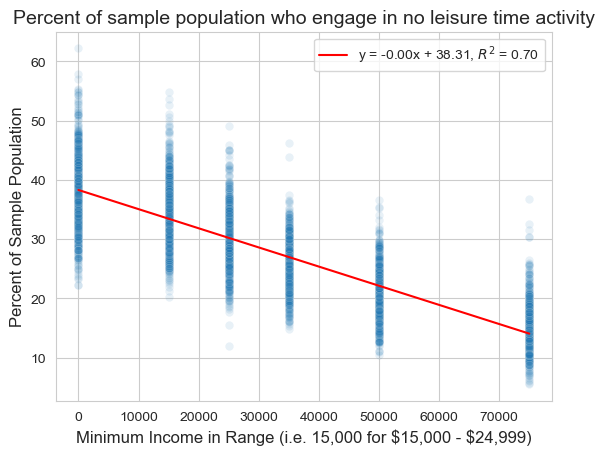

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sns.set_style(style='whitegrid')
sns.scatterplot(data=no_leisure_time, x='numeric_income', y='Data_Value', alpha=0.1)

model = LinearRegression()
x = no_leisure_time[['numeric_income']]
y = no_leisure_time['Data_Value']
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(x, y)

x_range = np.linspace(x.min(), x.max(), 100)  # Range of x values
y_pred = model.predict(x_range)  # Predicted y values
plt.plot(x_range, y_pred, color='red', label=f"y = {slope:.2f}x + {intercept:.2f}, $R^2$ = {r_squared:.2f}")

plt.title("Percent of sample population who engage in no leisure time activity", fontsize=14)
plt.xlabel("Minimum Income in Range (i.e. 15,000 for \$15,000 - \$24,999)", fontsize=12)
plt.ylabel("Percent of Sample Population", fontsize=12)
plt.legend()
plt.show()

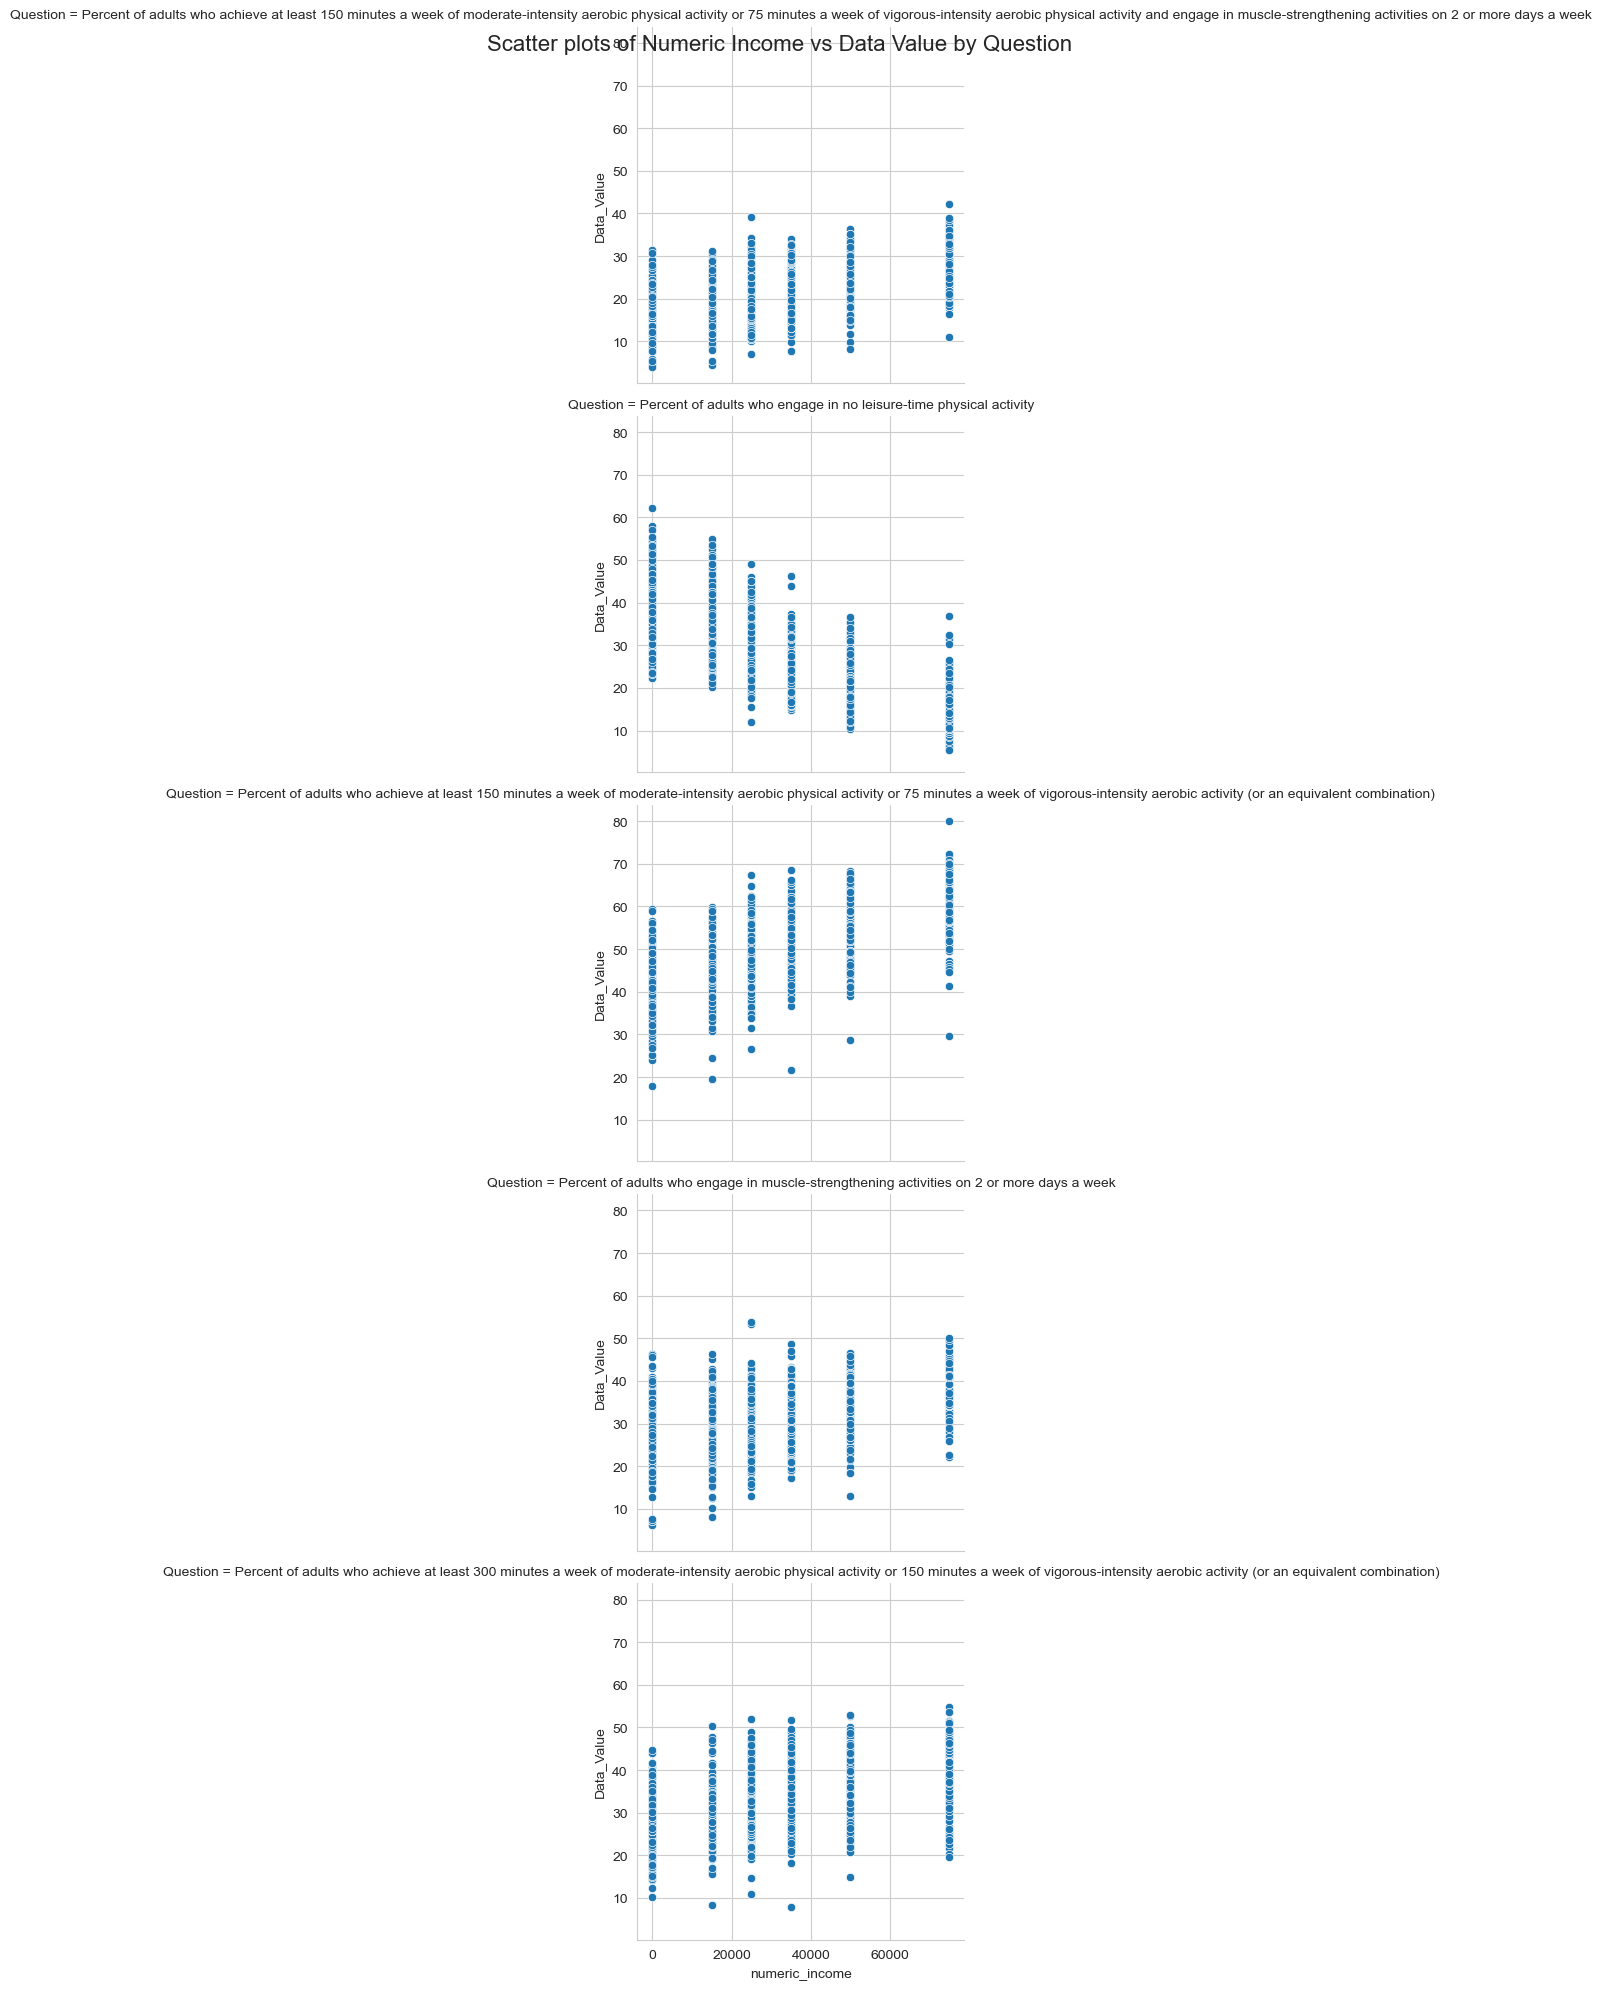

In [38]:
# create a FacetGrid to generate separate plots for each unique value of 'Question'
g = sns.FacetGrid(activity_clean, col='Question', col_wrap=1, height=4)  

# map the scatterplot to each facet
g.map(sns.scatterplot, 'numeric_income', 'Data_Value')

# adjust the layout and show t
g.fig.suptitle('Scatter plots of Numeric Income vs Data Value by Question', fontsize=16)
plt.show()